<a href="https://colab.research.google.com/github/Chinmay-47/Deep_Learning/blob/master/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

In [38]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# print(len(training_set_scaled))

In [39]:
X_train = []
Y_train = []
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    Y_train.append(training_set_scaled[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [40]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional

In [42]:
model = Sequential()

In [43]:
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

In [44]:
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

In [45]:
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

In [46]:
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

In [47]:
model.add(Dense(units = 1))

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_11 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)               

In [49]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [50]:
model.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0484
Epoch 2/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0084
Epoch 3/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0065
Epoch 4/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0066
Epoch 5/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0055
Epoch 6/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0054
Epoch 7/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0053
Epoch 8/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0042
Epoch 9/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0044
Epoch 10/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0046
Epoch 11/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0040
Epoch 12/100
1198/1198 [==============================] - 4s 4ms/step - lo

In [51]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [52]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

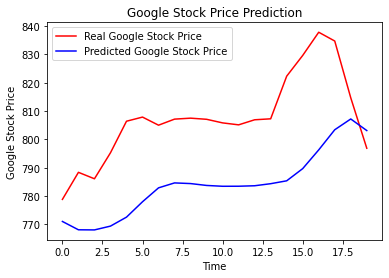

In [53]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()